# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
%pip install palmerpenguins

In [4]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

df = penguins.dropna()

# turn the catogoricial variables into dummy varaibles
# get dummies does it nice becasue there are more than two categorsie for species and island
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
df = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading and preparing data
penguins = load_penguins()
df = penguins.dropna()
# got get_dummies from pandas https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# converts categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

y = df['bill_depth_mm']
X = df.drop('bill_depth_mm', axis=1)
# found train_test_split in sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# splits data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
X1_train = X_train[['bill_length_mm']]
X1_test = X_test[['bill_length_mm']]

model1 = LinearRegression()
model1.fit(X1_train, y_train)

# mean_squared_error (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
# calculates the mean squared error between predictions and acual values
train_error1 = mean_squared_error(y_train, model1.predict(X1_train))
test_error1 = mean_squared_error(y_test, model1.predict(X1_test))

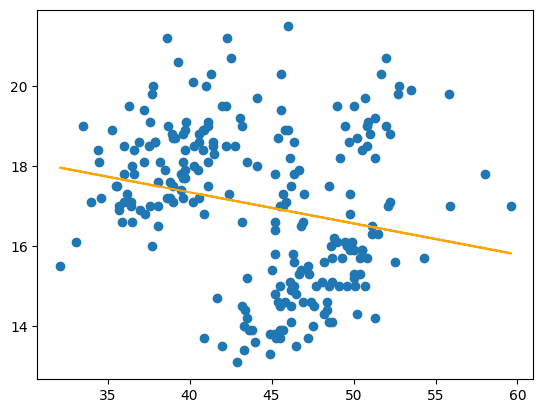

In [22]:
# couldnt figure out how to get it to work with ggplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
import matplotlib.pyplot as plt
plt.scatter(X1_train, y_train)
plt.plot(X1_train, model1.predict(X1_train), color='orange')
plt.show()

In [8]:
X2_train = X_train[['bill_length_mm', 'flipper_length_mm']]
X2_test = X_test[['bill_length_mm', 'flipper_length_mm']]

model2 = LinearRegression()
model2.fit(X2_train, y_train)

train_error2 = mean_squared_error(y_train, model2.predict(X2_train))
test_error2 = mean_squared_error(y_test, model2.predict(X2_test))

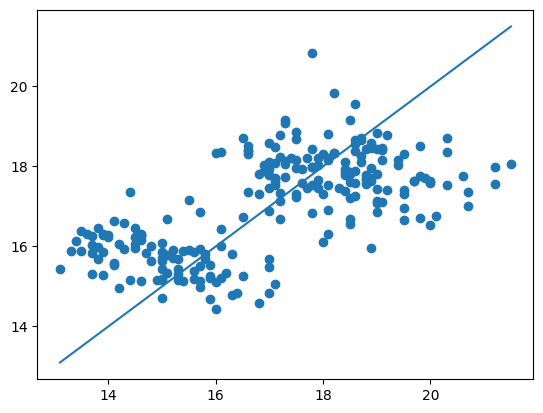

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_train, model2.predict(X2_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
plt.show()

In [10]:
X3_train = X_train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3_test = X_test[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]

model3 = LinearRegression()
model3.fit(X3_train, y_train)

train_error3 = mean_squared_error(y_train, model3.predict(X3_train))
test_error3 = mean_squared_error(y_test, model3.predict(X3_test))

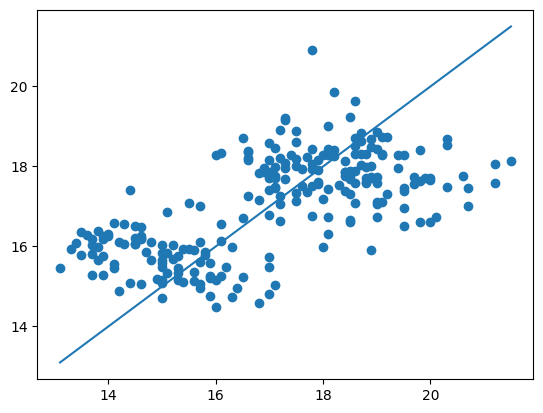

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_train, model3.predict(X3_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
plt.show()

In [30]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

train_error4 = mean_squared_error(y_train, model4.predict(X_train))
test_error4 = mean_squared_error(y_test, model4.predict(X_test))

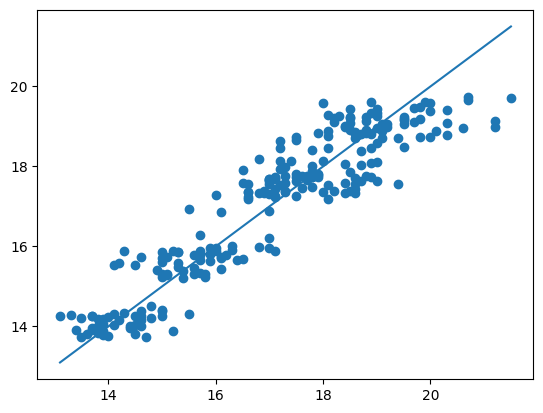

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_train, model4.predict(X_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
plt.show()

In [32]:
test_errors = [test_error1, test_error2, test_error3, test_error4]
test_errors

[3.8373047241842198, 2.8865013195658196, 2.8604892863673, 0.7877344378981891]

Model 4 is the best becasue it has the lowest test error.